## Multi class

In [1]:
import sys
sys.path.insert(0, '..')

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from activation import TanH, Sigmoid, ReLU, Softmax
from enums import GradientDescentMode
from linear import Linear
from loss import MSELoss, CELoss, BCELoss, HingeLoss
from sequential import Sequential
from optimizers import SGD
from utils import onehot_encoding

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [7]:
plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')

### Iris

In [79]:
iris = datasets.load_iris()

print('Nombre d exemples :', len(iris.data))
print('Nombre de features :', len(iris.feature_names))
print('Nombre de classes :', len(iris.target_names))

Nombre d exemples : 150
Nombre de features : 4
Nombre de classes : 3


In [80]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2)
print('Données d apprentissage :', X_train.shape, y_train.shape)
print('Données de test :', X_test.shape, y_test.shape)

Données d apprentissage : (120, 4) (120,)
Données de test : (30, 4) (30,)


In [85]:
y_train_onehot = onehot_encoding(y_train, 3)
y_test_onehot = onehot_encoding(y_test, 3)
print('One hot train :', y_train_onehot.shape)
print('One hot test :', y_test_onehot.shape)

One hot train : (120, 3)
One hot test : (30, 3)


In [82]:
def eval_fn(net, X_test, y_test):
    y_pred = net(X_test).argmax(1)
    y_test = y_test.argmax(1)
    return np.mean(y_pred == y_test)

In [86]:
net = Sequential(
    Linear(4, 10),
    ReLU(),
    Linear(10, 3),
)

lr = 1e-1
epochs = 1_000
loss = CELoss()
all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    lr,
    X_train,
    y_train_onehot,
    epochs,
    GradientDescentMode.BATCH,
    -1,
    eval_fn,
    X_test,
    y_test_onehot,
)

Train : -----------------------------------
Epoch 100: train loss: 0.31925530034757493 val loss: 0.2539342936336468 val eval_fn: 0.8666666666666667
Epoch 200: train loss: 0.20161380681246363 val loss: 0.1524065873170641 val eval_fn: 0.9333333333333333
Epoch 300: train loss: 0.13851362310377163 val loss: 0.10118469263895832 val eval_fn: 0.9666666666666667
Epoch 400: train loss: 0.11844546005703929 val loss: 0.08387547326271179 val eval_fn: 0.9666666666666667
Epoch 500: train loss: 0.10543103890876313 val loss: 0.0707394331131611 val eval_fn: 0.9666666666666667
Epoch 600: train loss: 0.0971605588452442 val loss: 0.06182868540730397 val eval_fn: 1.0
Epoch 700: train loss: 0.09196541220799434 val loss: 0.05558261028443447 val eval_fn: 1.0
Epoch 800: train loss: 0.0885046892565919 val loss: 0.050955851199703896 val eval_fn: 1.0
Epoch 900: train loss: 0.0857647565179907 val loss: 0.04722713406540516 val eval_fn: 1.0
Epoch 1000: train loss: 0.08338874361700618 val loss: 0.044075186186474415 v

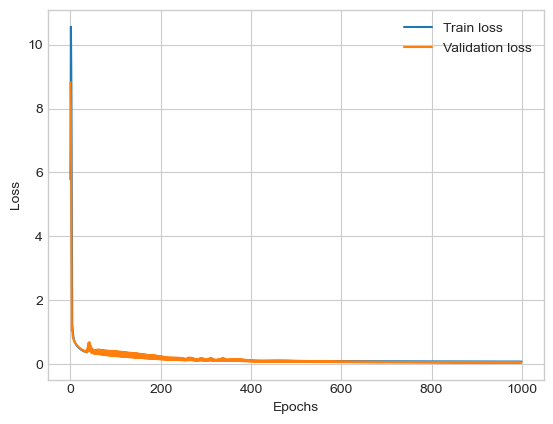

In [87]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

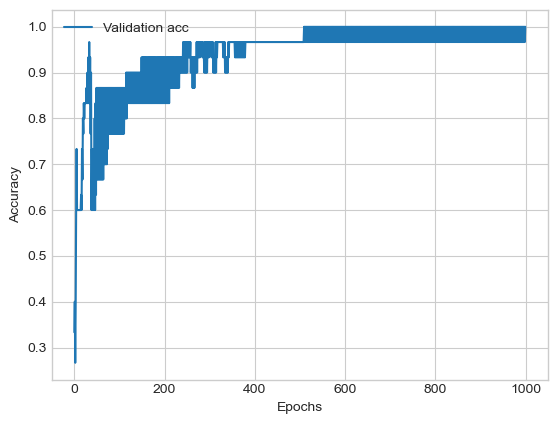

In [97]:
plt.plot(all_acc_valid, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [98]:
eval_fn(net, X_train, y_train_onehot)

0.9666666666666667

In [104]:
def plot_confusion_matrix(net, X, y):
    y_pred = net(X).argmax(1)
    cm = confusion_matrix(y, y_pred)
    sns.set(font_scale=1)
    sns.heatmap(cm, annot=True, annot_kws={"size": 10}, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

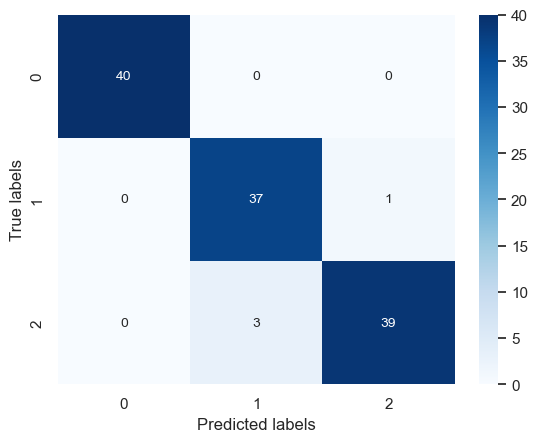

In [105]:
plot_confusion_matrix(net, X_train, y_train)

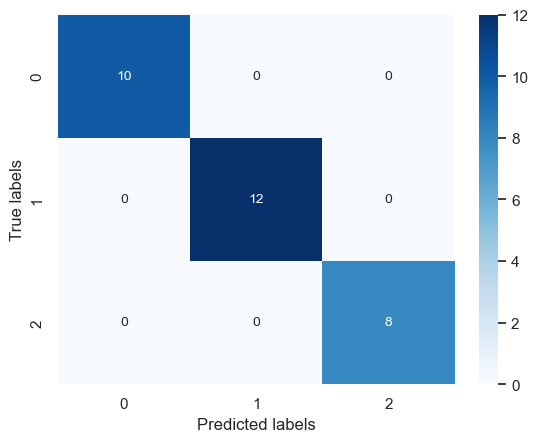

In [107]:
plot_confusion_matrix(net, X_test, y_test)

### Digits

In [99]:
digits = datasets.load_digits()

print('Nombre d exemples :', len(digits.data))
print('Nombre de features :', len(digits.feature_names))
print('Nombre de classes :', len(digits.target_names))

Nombre d exemples : 1797
Nombre de features : 64
Nombre de classes : 10


In [108]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.2)
print('Données d apprentissage :', X_train.shape, y_train.shape)
print('Données de test :', X_test.shape, y_test.shape)

Données d apprentissage : (1437, 64) (1437,)
Données de test : (360, 64) (360,)


In [110]:
y_train_onehot = onehot_encoding(y_train, 10)
y_test_onehot = onehot_encoding(y_test, 10)
print('One hot train :', y_train_onehot.shape)
print('One hot test :', y_test_onehot.shape)

One hot train : (1437, 10)
One hot test : (360, 10)


In [117]:
net = Sequential(
    Linear(64, 100),
    ReLU(),
    Linear(100, 100),
    ReLU(),
    Linear(100, 10),
)

lr = 1e-1
epochs = 1_000
loss = CELoss()
all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    lr,
    X_train,
    y_train_onehot,
    epochs,
    GradientDescentMode.BATCH,
    -1,
    eval_fn,
    X_test,
    y_test_onehot,
)

Train : -----------------------------------
Epoch 100: train loss: 0.039967280743163365 val loss: 0.09974350247324383 val eval_fn: 0.9666666666666667
Epoch 200: train loss: 0.013519347814716899 val loss: 0.09783961305211657 val eval_fn: 0.9694444444444444
Epoch 300: train loss: 0.007006594787631429 val loss: 0.0978144709463412 val eval_fn: 0.9694444444444444
Epoch 400: train loss: 0.004513081918488271 val loss: 0.09877039632298674 val eval_fn: 0.9722222222222222
Epoch 500: train loss: 0.00325937366855716 val loss: 0.10023798630498142 val eval_fn: 0.9722222222222222
Epoch 600: train loss: 0.002522025961383773 val loss: 0.10195424909321041 val eval_fn: 0.9722222222222222
Epoch 700: train loss: 0.002041383559508412 val loss: 0.10372709957477914 val eval_fn: 0.9722222222222222
Epoch 800: train loss: 0.0017023729551153618 val loss: 0.10530589238102128 val eval_fn: 0.9722222222222222
Epoch 900: train loss: 0.0014536312911313785 val loss: 0.1066398400402289 val eval_fn: 0.9722222222222222
Epo

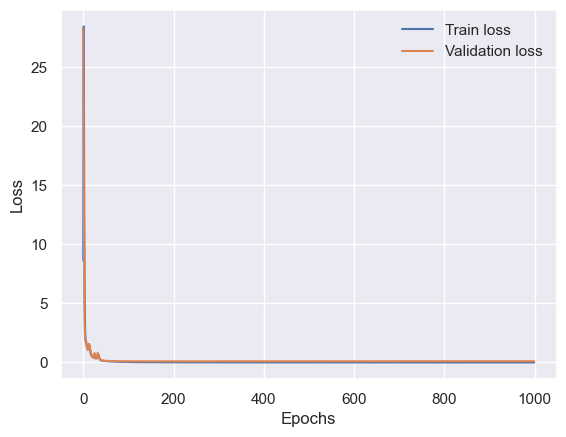

In [118]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

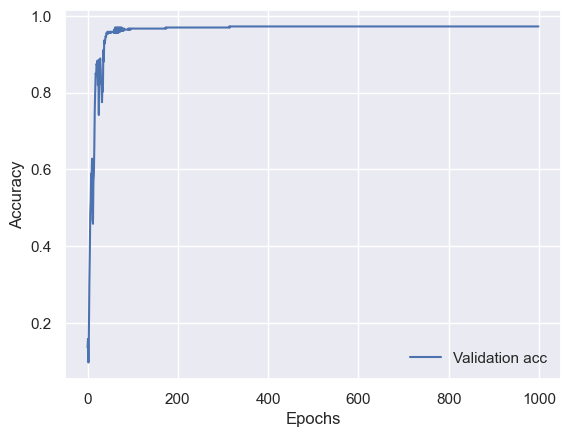

In [119]:
plt.plot(all_acc_valid, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [121]:
eval_fn(net, X_train, y_train_onehot)

1.0

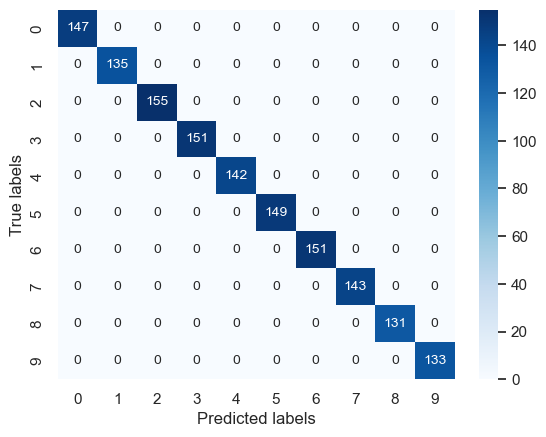

In [120]:
plot_confusion_matrix(net, X_train, y_train)

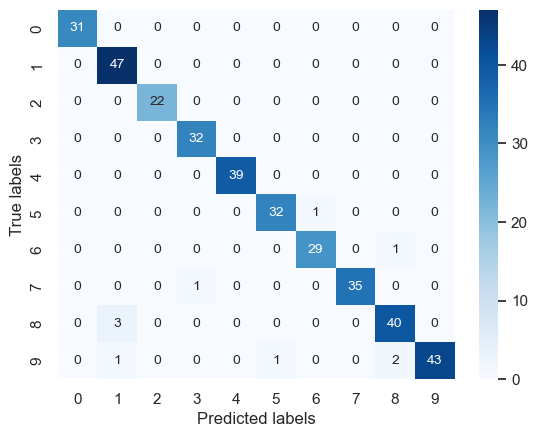

In [122]:
plot_confusion_matrix(net, X_test, y_test)